# Exploratary Data Analysis (EDA) Using Visualisation

As discussed in this week lecture, there are two types of
<li>Statistical EDA</li>
<li>Visualisation based EDA</li>

In this part of tutorial, you are going to learn Visualisation based EDA. We will using Matplotlib for this purpose.

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore today is [Matplotlib](http://matplotlib.org/).  As mentioned on their website:

> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.




### Matplotlib.Pyplot

We will using one of the core plotting library in Matplotlib called `matplotlib.pyplot`. There are several 'pyplot' functions that allow changes to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this tutorial we are going to learn several types of plotting functios for enabling EDA.

In [5]:
# we are using the inline backend
#%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
#check version of MAtplotlib
print('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.3.4


In [7]:
#select style of your graphs
print(plt.style.available)
mpl.style.use(['ggplot']) 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Line Plot

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

Let us plot airquality dataset

In [8]:
import pandas as pd
#read data
df=pd.read_csv('airquality.csv')
#data preperation
df_row =df.dropna(axis=0).copy()
df_row.isnull().sum()

df_row.info()
# creating a date column
df_row['date']=pd.to_datetime(df_row[['Year','Month','Day' ]])
#df_new['date']=df_new['date'].astype(int)
df_new=df_row
df_new.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 152
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
 4   Month    111 non-null    int64  
 5   Day      111 non-null    int64  
 6   Year     111 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 6.9 KB


,Ozone,Solar.R,Wind,Temp,Month,Day,Year,date
0,41.0,190.0,7.4,67,5,1,2000,2000-05-01
1,36.0,118.0,8.0,72,5,2,2000,2000-05-02
2,12.0,149.0,12.6,74,5,3,2000,2000-05-03
3,18.0,313.0,11.5,62,5,4,2000,2000-05-04
6,23.0,299.0,8.6,65,5,7,2000,2000-05-07


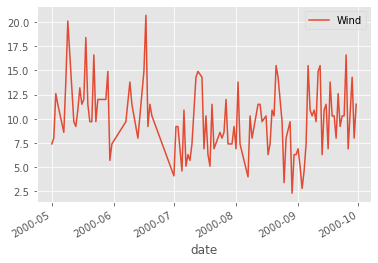

In [9]:
#start plotting
df_new.plot.line(x='date', y='Wind')

#plt.title('Environment')
#plt.ylabel('Ozone')
#plt.xlabel('Day')

plt.show()

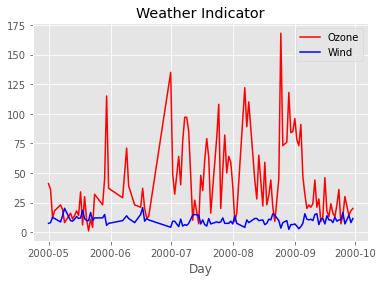

In [10]:

plt.plot(df_new['date'], df_new['Ozone'], 'red', label='Ozone')
plt.plot(df_new['date'], df_new['Wind'], 'blue', label='Wind')
plt.title('Weather Indicator')
#plt.ylabel('Ozone')
plt.xlabel('Day')
plt.legend()
plt.show()

There are many other graphs available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

*   `bar` for vertical bar plots
*   `barh` for horizontal bar plots
*   `hist` for histogram
*   `box` for boxplot
*   `kde` or `density` for density plots
*   `area` for area plots
*   `pie` for pie plots
*   `scatter` for scatter plots
*   `hexbin` for hexbin plot

Raad Following for more details
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html


## Histogram

A histogram is a graphical representation of the distribution of numerical data. It is
an estimate of the probability distribution of a continuous variable (quantitative
variable). The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely

In [11]:
import numpy as np
#creating the bins using numpy library
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_new['Ozone'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins


[27 33 19  8 10  7  3  2  1  1]
[  1.   17.7  34.4  51.1  67.8  84.5 101.2 117.9 134.6 151.3 168. ]


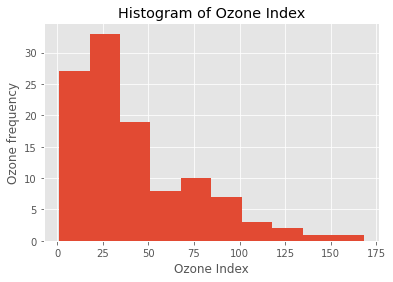

In [12]:
df_new['Ozone'].plot(kind='hist')

# add a title to the histogram
plt.title('Histogram of Ozone Index')
# add y-label
plt.ylabel('Ozone frequency')
# add x-label
plt.xlabel('Ozone Index')

plt.show()

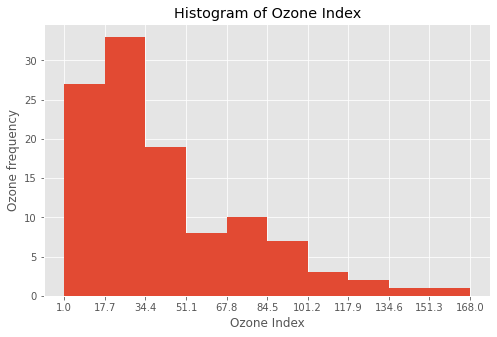

In [13]:
count, bin_edges = np.histogram(df_new['Ozone'])
#using bins to have exact bin boundries
df_new['Ozone'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

# add a title to the histogram
plt.title('Histogram of Ozone Index')
# add y-label
plt.ylabel('Ozone frequency')
# add x-label
plt.xlabel('Ozone Index')

plt.show()

## Scatterplot
A scatter plot is a type of mathematical diagram using Cartesian coordinates to display values for two variables for a set of data

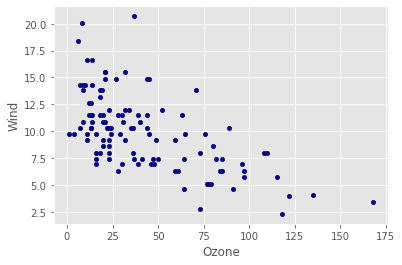

In [14]:

#scatterplot
ax1 = df_new.plot.scatter(x='Ozone',y='Wind',c='DarkBlue')
                      
                     

## Box Plot
Boxplot is a convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the
terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

It can point out outliers using it.

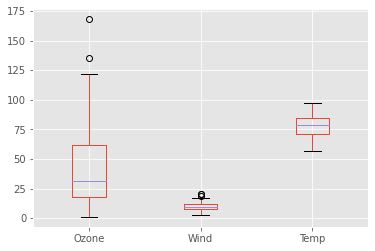

In [15]:
boxplot = df_new.boxplot(column=['Ozone', 'Wind', 'Temp']) 

## Bar Graphs
These graphs are suitable for categorical data

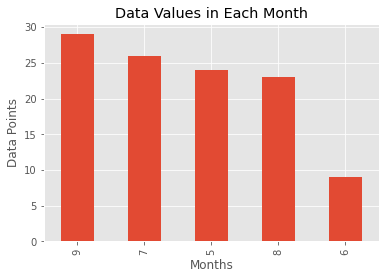

In [16]:
#Bar Graph for Categorical Values
count, bin_edges = np.histogram(df_new['Ozone'])

df_new['Month'].value_counts().plot(kind='bar')

plt.title('Data Values in Each Month') # add a title to the histogram
plt.ylabel('Data Points') # add y-label
plt.xlabel('Months') # add x-label

plt.show()



## Pie Chart
A pie plot is a proportional representation of the numerical data in a column.

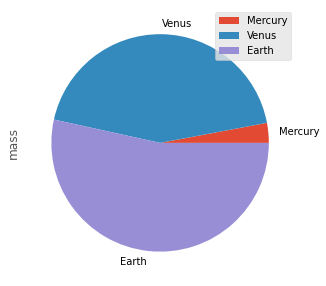

In [17]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))